Here, I will implement the Eigenface algorithm, which involves performing PCA on images of human faces.

Reference: M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). Journal of Cognitive Neuroscience. 3 (1): 71–86

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA


# Loading Dataset
This part of code is reference of scikit learn documentation (https://scikit-learn.org/0.16/auto_examples/applications/face_recognition.html)

In [2]:
lfw_people = fetch_lfw_people()

# introspect the images arrays to find the shapes
n_samples, h, w = lfw_people.images.shape
 
# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]
 
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("There are  %d" % n_samples + " of faces")
print("The shape of dataset: (%d, %d, %d)" % lfw_people.images.shape)


Total dataset size:
There are  13233 of faces
The shape of dataset: (13233, 62, 47)


# EDA of dataset
Explore the data in dataset and verify the images with name

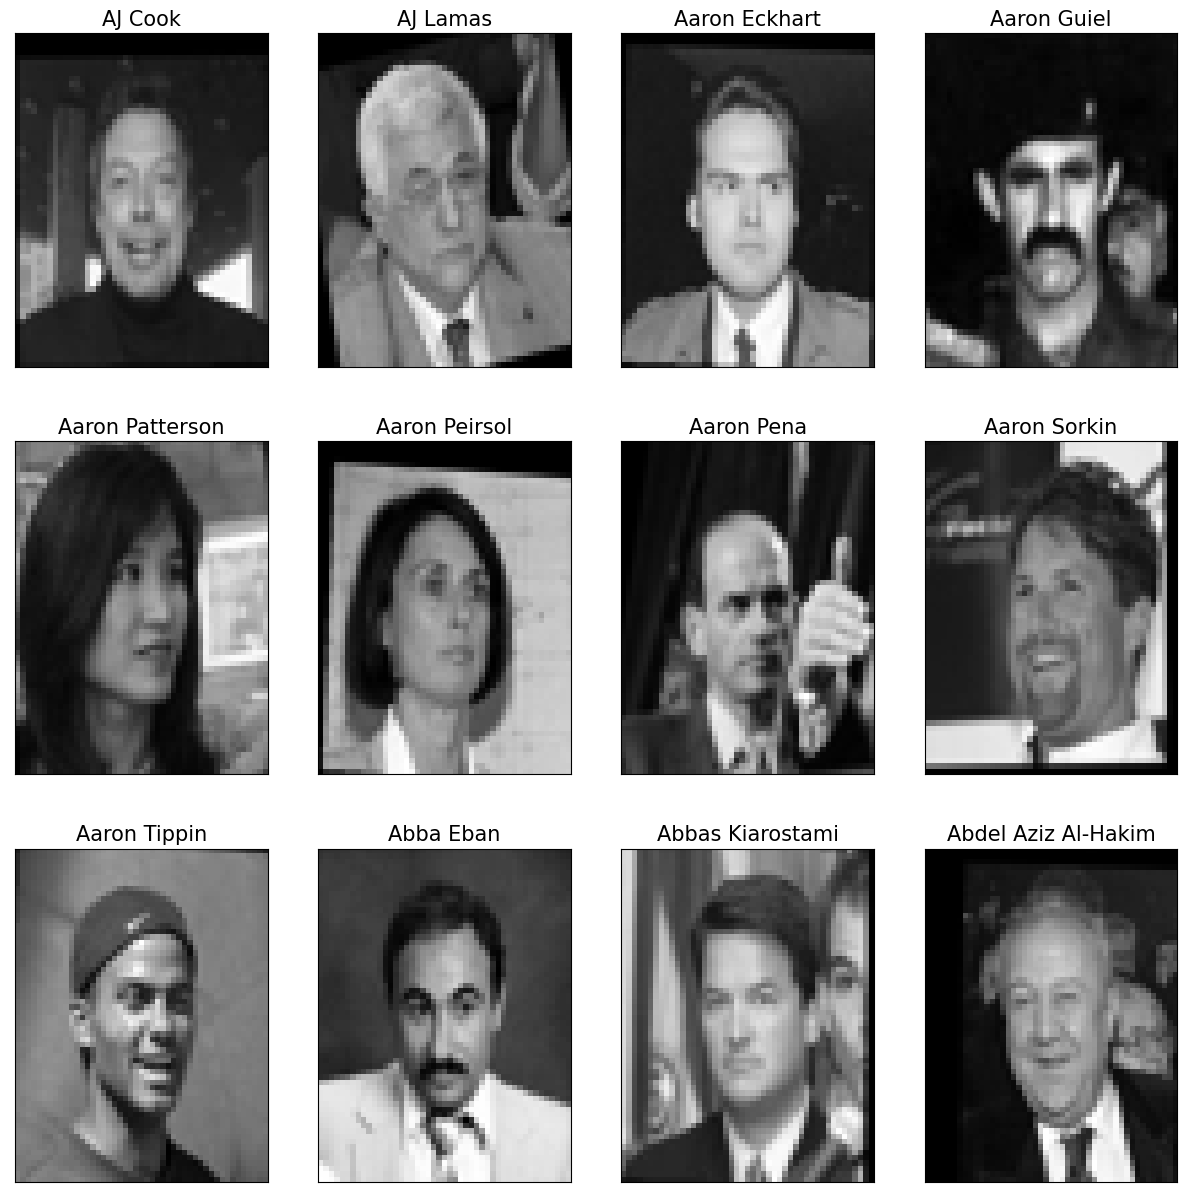

In [3]:
fig, axs = plt.subplots(3,4, figsize = (15,15))

for face_img, face_name, ax in zip(lfw_people.images,target_names,axs.flatten()):
    ax.imshow(face_img.reshape((h, w)), cmap = plt.cm.gray)
    ax.set_title(face_name, fontsize = 15)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Visualize the "mean face"
Take the mean face image across the dataset and show it below. It shows all the genereal characteristics of a face (eyes noses mouth facial structure)

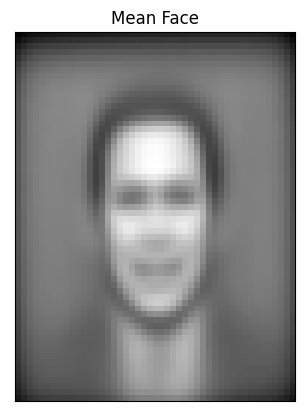

In [4]:
mean_face_plot = plt.imshow(lfw_people.images.mean(axis=0),cmap=plt.get_cmap('gray'))
mean_face_plot.axes.set_title(f'Mean Face')
mean_face_plot.axes.get_xaxis().set_visible(False)
mean_face_plot.axes.get_yaxis().set_visible(False)
plt.show()

# Perform PCA on face data
<img src="DataMatrix.png" alt="Column Image Vector" />

X has data already in the form  of a vector as showed in the figure above. With that, we can perform PCA on images.

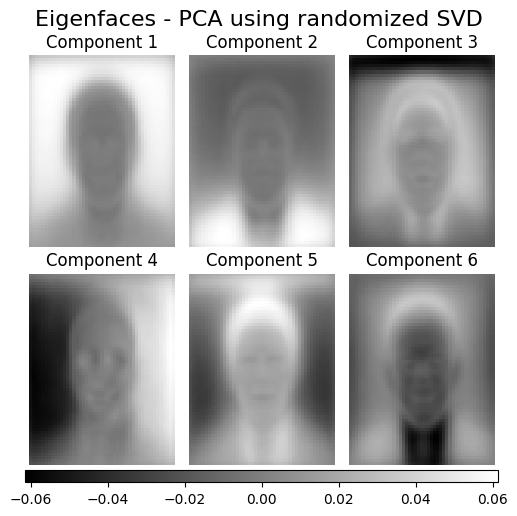

In [5]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (h, w)

pca_estimator = PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit_transform(X)

fig, axs = plt.subplots(n_row,n_col, figsize = (5,5),constrained_layout=True)
fig.suptitle("Eigenfaces - PCA using randomized SVD", size=16)
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)

i = 1
for ax, vec in zip(axs.flat, pca_estimator.components_[:n_components]):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.set_title("Component " + str(i))
        ax.axis("off")
        i += 1

fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()

The results are very interesting, and give us insight into how the images vary in different components. Then, we can further inspect on 90 components. 

In [6]:
# Compute the components and projected faces
pca = PCA(90)
components = pca.fit_transform(X)
projected = pca.inverse_transform(components)

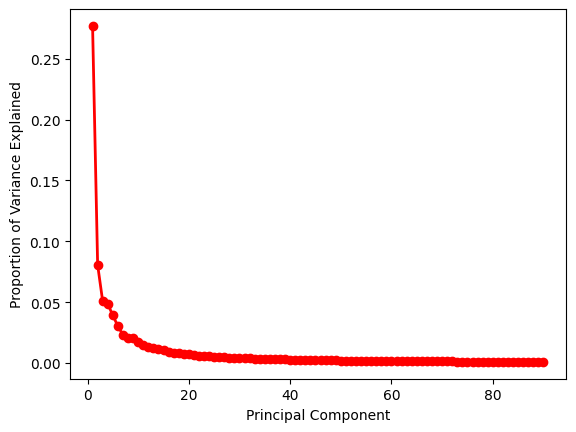

In [7]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

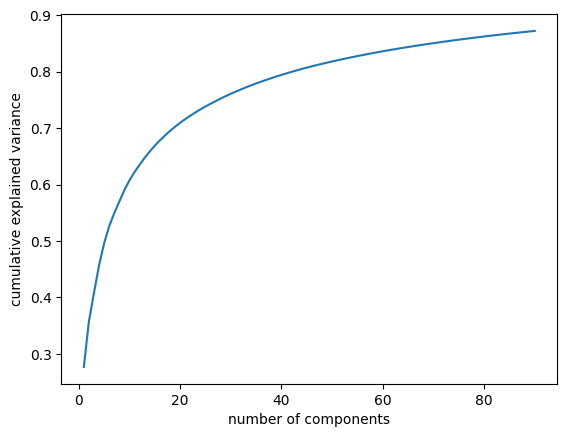

In [8]:
plt.plot(np.arange(pca.n_components_) + 1, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From the graph, we can see that these 90 components account for just over 80% of the variance. That would lead us to believe that using these 90 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 80 components:

Text(0, 0.5, 'Reconstruction')

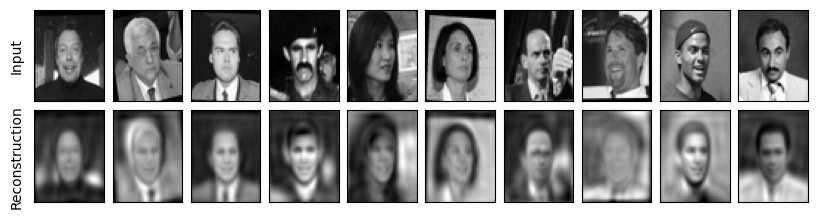

In [9]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(h, w), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(h, w), cmap='binary_r')
    
ax[0, 0].set_ylabel('Input')
ax[1, 0].set_ylabel('Reconstruction')

# Load own images
Now I will perform PCA on my own faces. I have prepare 8 pictures of selfies.

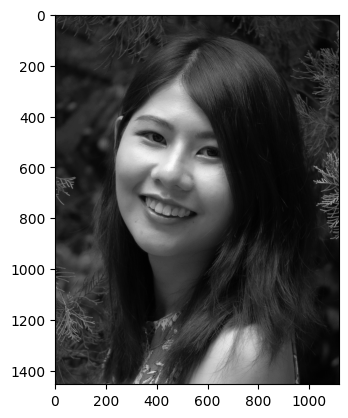

In [10]:
import cv2
import os

path='D:\PSRS\Semester 3\Biometric II\homework II\crop_face'
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break

In [11]:
# create a function to load the image data 
def create_data(path):
    list_new_array=[]
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            size=100
            new_array=cv2.resize(img_array,(size,size))
            list_new_array.append(new_array)
        except Exception as e:
            pass
    return list_new_array    

In [12]:
# reshape the data 
myface=np.array(create_data(path))
myface_reshape=myface.reshape(8, 100*100).astype('float32')
myface_reshape.shape

(8, 10000)

In [13]:
# Compute the components and projected faces
pca = PCA(8)
components = pca.fit_transform(myface_reshape)
projected = pca.inverse_transform(components)

Text(0, 0.5, 'cumulative explained variance')

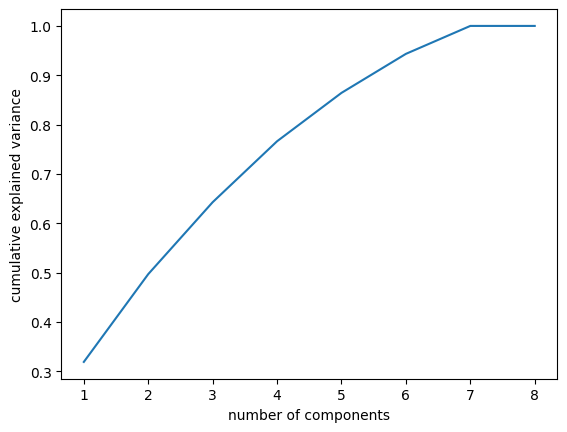

In [14]:
plt.plot(np.arange(pca.n_components_) + 1, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From the graph, we can see that with 8 components account for 100% of the variance. We would recover most of the essential characteristics of the data with 8 components and we can compare the input images with the images reconstructed from 8 components.

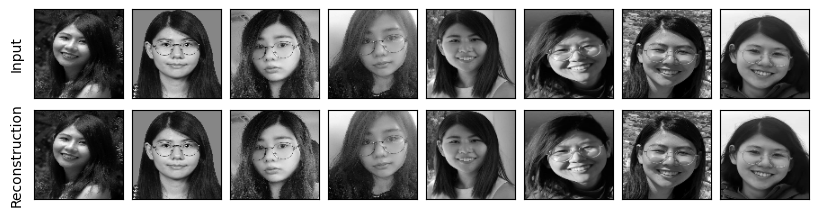

In [15]:
# Plot the results
fig, ax = plt.subplots(2, 8, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(8):
    ax[0, i].imshow(myface_reshape[i].reshape(100, 100), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(100, 100), cmap='binary_r')
    
ax[0, 0].set_ylabel('Input')
ax[1, 0].set_ylabel('Reconstruction');

We also can inspect the result with reconstruction images from 3 to 8 components.

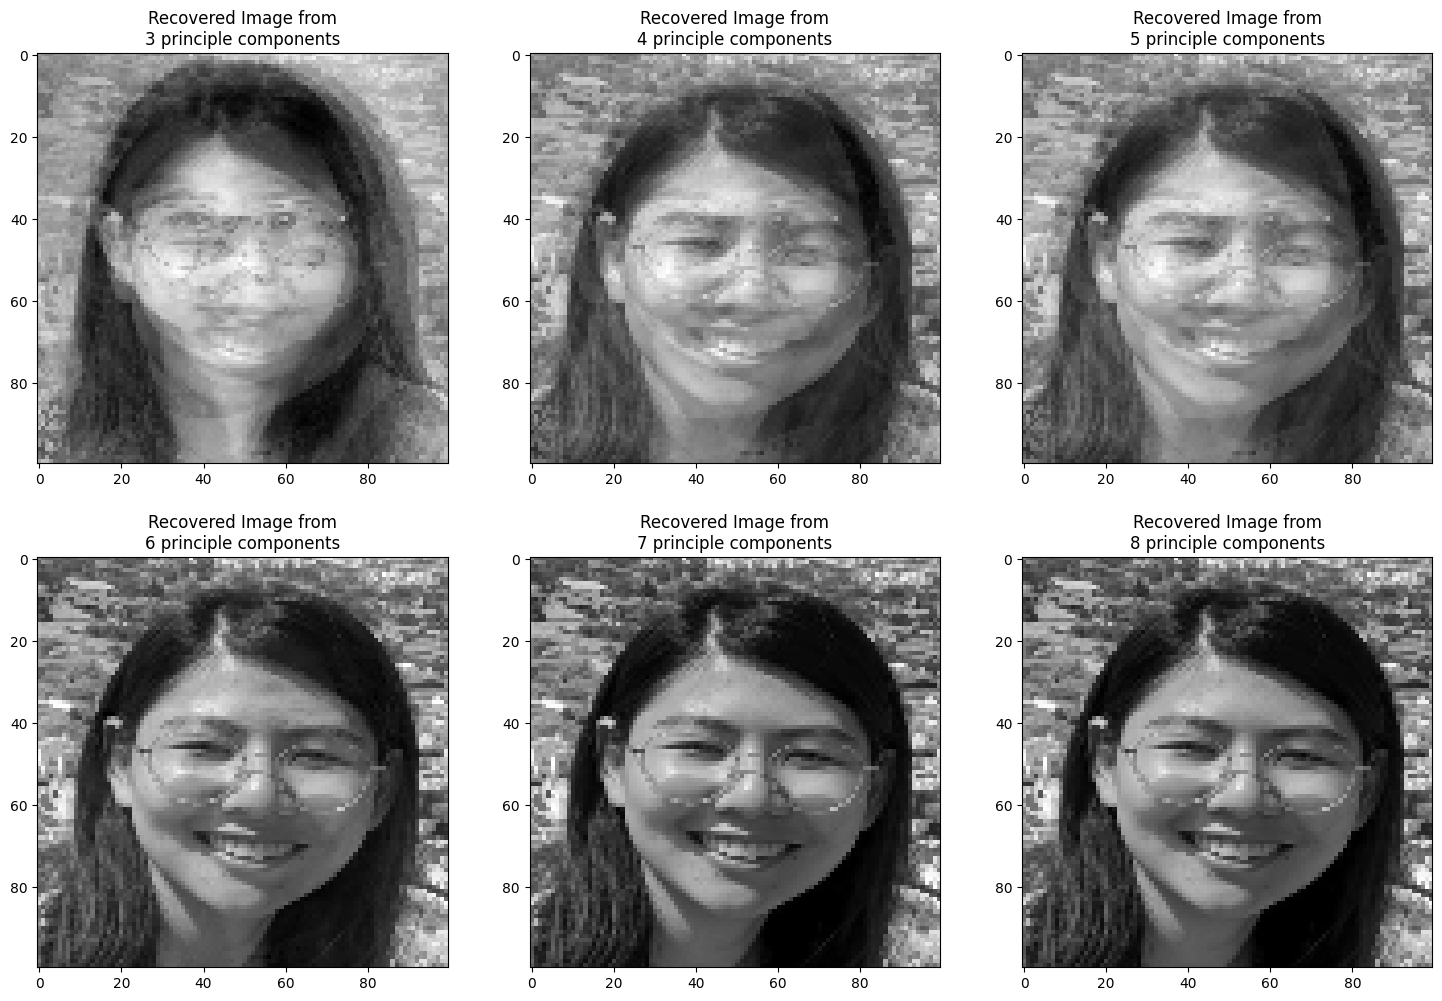

In [16]:
# image changes with different n component!
plt.figure(figsize=(18,12))
for i in [3,4,5,6,7,8]:
    plt.subplot(2,3,i-2)
    pca = PCA(n_components=i)
    pca.fit(myface_reshape)
    compressed = pca.transform(myface_reshape)
    plt.title('Recovered Image from\n{} principle components'.format(i))
    plt.imshow(pca.inverse_transform(compressed[6]).reshape(100,100), cmap=plt.cm.gray)